# Descripción del proyecto

## Objetivo

Zuber, es una nueva empresa de viajes compartidos que se está lanzando en Chicago. El objetivo es encontrar patrones en la información disponible. Comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

In [1]:
#Se importan las librerías que se estarán utilizando para el proyecto

import requests # Importa la librería para enviar solicitudes al servidor
import pandas as pd
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup # Importa la librería para analizar la página web
from scipy import stats as st
import numpy as np

## Análisis exploratorio de datos

In [2]:
#Se importa la información de los archivos, se nombran los dataframes a trabajar, y se visualiza la información para estudiar
#la información que contiene, y de que manera se encuentra capturada

df_cabs = pd.read_csv('/datasets/project_sql_result_01.csv')
print(df_cabs.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [3]:
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
print(df_trips.head(20))

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
5              Lake View    2420.966667
6             Grant Park    2068.533333
7          Museum Campus    1510.000000
8             Gold Coast    1364.233333
9     Sheffield & DePaul    1259.766667
10          Lincoln Park    1246.533333
11          East Village    1212.066667
12     Little Italy, UIC     863.700000
13                Uptown     849.666667
14       Near South Side     839.833333
15        Garfield Ridge     745.400000
16          Logan Square     620.333333
17             Edgewater     583.300000
18             West Town     516.400000
19              Old Town     469.566667


In [4]:
#Se estudia la estructura de los dataframes, para conocer los tipos de datos, cantidad de entradas, probabilidad de datos nulos,
#etc, para saber si hay que tratar algún tipo de información

df_cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
#Se redondea el número de decimales que arroja el campo "average_trips" a dos decimales, para una mejor vista, y manejo de
#campo a la hora de utilizarla, para análisis

df_trips['average_trips'] = df_trips['average_trips'].round(2)
df_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


In [7]:
#Identificar los 10 principales barrios en términos de finalización del recorrido

recorrido = df_trips.groupby('dropoff_location_name')['average_trips'].max().sort_values(ascending=False).head(10)
recorrido

dropoff_location_name
Loop                  10727.47
River North            9523.67
Streeterville          6664.67
West Loop              5163.67
O'Hare                 2546.90
Lake View              2420.97
Grant Park             2068.53
Museum Campus          1510.00
Gold Coast             1364.23
Sheffield & DePaul     1259.77
Name: average_trips, dtype: float64

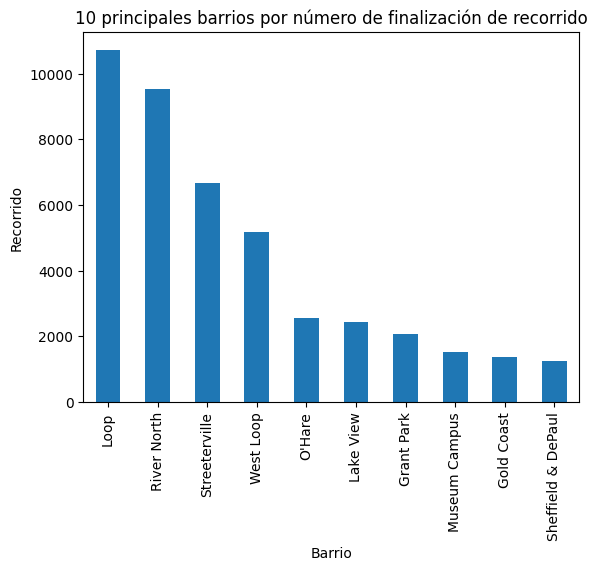

In [8]:
#Visualiazión por medio de gráfico los 10 principales barrios para una comprensión más visual sobre los datos.

recorrido.plot(kind='bar', title='10 principales barrios por número de finalización de recorrido', xlabel='Barrio', ylabel='Recorrido')
plt.show()

### Conclusión

Podemos observar que hay una fuerte demanda en recorridos principalmente en el barrio de Loop, seguido por River North, Streeterville, West Loop, lo que nos indica que en estos barrios es donde son más solicitados los viajes, ya que probablemente en dichos barrios, la población no cuenta con un método de transporte propio, por lo que utilizar una buena estrategia en estos puntos sería de gran valor para aprovechar la demanda que se tiene.

In [9]:
#Obtener las 10 principales compañías de taxis en términos de recorridos

taxis_top_10 = df_cabs.groupby('company_name')['trips_amount'].max().sort_values(ascending=False).head(10)
taxis_top_10

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64

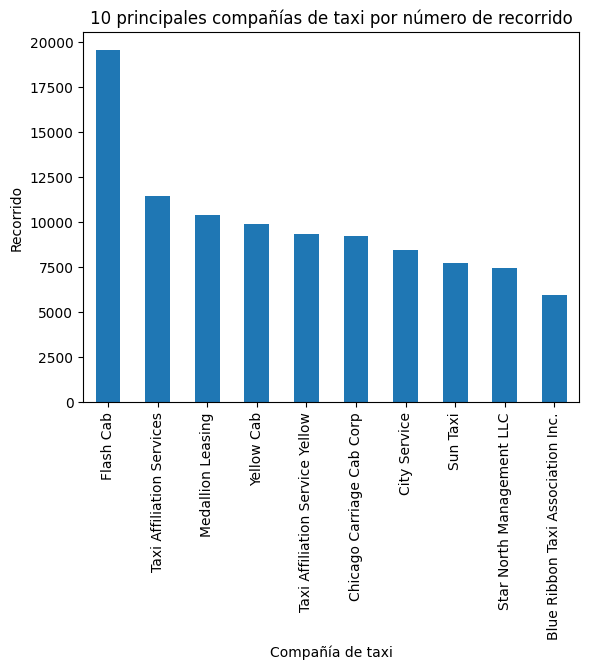

In [10]:
#Visualiazión por medio de gráfico las 10 principales compañías de taxi para una comprensión más visual sobre los datos.

taxis_top_10.plot(kind='bar', title='10 principales compañías de taxi por número de recorrido', xlabel='Compañía de taxi', ylabel='Recorrido')
plt.show()

### Conclusión

Podemos observar que la compañía de taxi más solicitada para realizar los recorridos, por una diferencia bastante considerable es Flash Cab, lo cual sería de bastante apoyo analizar dicha compañía para conocer que diferenciador tiene y aporta dicha compañía para la población, conocer porque las personas prefieren dicha compañía, para saber que está haciendo bien, que pudiera mejorar, y porque no, hasta saber que diferenciador tiene, para en caso de necesitarse, probablemente replicarlo en otras compañías a la hora de realizar alguna estrategia, para incrementar sus viajes (esto en caso de que se trate de otra compañía), o bien en caso de tratarse de Flash Cab, saber que mejoras o diferenciadores se pueden agregar, para seguir incrementando sus viajes.

## Prueba de hipótesis

In [11]:
#Se importa el archivo a analizar para la prueba de hipótesis y se visualiza la información capturada

df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_weather.head(15))

               start_ts weather_conditions  duration_seconds
0   2017-11-25 16:00:00               Good            2410.0
1   2017-11-25 14:00:00               Good            1920.0
2   2017-11-25 12:00:00               Good            1543.0
3   2017-11-04 10:00:00               Good            2512.0
4   2017-11-11 07:00:00               Good            1440.0
5   2017-11-11 04:00:00               Good            1320.0
6   2017-11-04 16:00:00                Bad            2969.0
7   2017-11-18 11:00:00               Good            2280.0
8   2017-11-11 14:00:00               Good            2460.0
9   2017-11-11 12:00:00               Good            2040.0
10  2017-11-18 06:00:00               Good            1500.0
11  2017-11-04 11:00:00               Good            2040.0
12  2017-11-11 08:00:00               Good            1470.0
13  2017-11-04 08:00:00               Good            1546.0
14  2017-11-11 16:00:00               Good            2100.0


In [12]:
#Se estudia la estructura del dataframe, para conocer tipos de datos, número de entradas, posible información nula, para
#saber que información se tiene que tratar

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
#Se cambia el tipo de datos del campo "start_ts" a datetime, y de extrae el día de la semana a una columna nueva

df_weather['start_ts']=pd.to_datetime(df_weather['start_ts'], format = '%Y-%m-%d')
df_weather['week_day']=df_weather['start_ts'].dt.weekday
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   week_day            1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [14]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds,week_day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [15]:
#Query para filtrar la duración de los viajes en los que las condiciones del clima es "malo", ya que en esta definición 
#es donde se encuentra clasificado los días lluviosos

bad_weather= df_weather.query('weather_conditions == "Bad"')['duration_seconds']
bad_weather

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [16]:
#Se obtiene la varianza para las condiciones del clima 'malo'

print('La varianza en condiciones de clima malo es:', bad_weather.var())

La varianza en condiciones de clima malo es: 520294.086002483


In [17]:
#Query para filtrar la duración de los viajes los días en los que las condiciones del clima es "bueno"

good_weather=df_weather.query('weather_conditions == "Good"')['duration_seconds']
good_weather

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [18]:
#Se obtiene la varianza para las condiciones del clima 'bueno'

print('La varianza en condiciones de clima bueno es:', good_weather.var())

La varianza en condiciones de clima bueno es: 576382.009689509


In [19]:
#Probar hipótesis nula y alternativa sobre la duración promedio de los viajes desde el Loop hasta el Aeropuerto 

alpha=0.05

p_levene=st.levene(bad_weather, good_weather).pvalue

print(f'Valor p: {round(p_levene,2)}')
if p_levene > alpha:
    print("No se rechaza la hipótesis nula sobre la igualdad de las varianzas")
else:
    print('Se rechaza la hipótesis nula sobre la igualdad de las varianzas')

Valor p: 0.53
No se rechaza la hipótesis nula sobre la igualdad de las varianzas


In [20]:
#Probar hipótesis nula y alternativa sobre la duración promedio de los viajes desde el Loop hasta el Aeropuerto 
#Internacional O'Hare cambia los sábados lluviosos

prom_trips_rainyday = st.ttest_ind(bad_weather,good_weather, equal_var=True).pvalue
print(f'Valor p: {prom_trips_rainyday}')

if prom_trips_rainyday < alpha:
    print('Se rechaza la hipótesis nula sobre la duración promedio de viajes cambia los sábados lluviosos')
else:
    print('No se rechaza la hipótesis nula sobre la duración promedio de viajes cambia los sábados lluviosos')

Valor p: 6.517970327099473e-12
Se rechaza la hipótesis nula sobre la duración promedio de viajes cambia los sábados lluviosos


### Conclusión

Se plantea la hipótesis nula de sobre la igualdad de las medias de dos poblaciones para analizar dos muestras tanto la muestra con condiciones de clima "bueno", contra la muestra con condiciones de clima "malo", para obtener que tanta diferencia hay en cuanto a duración promedio de viajes entre estas dos. Se obtienen los datos de la duración de viajes de ambas muestras, para luego aplicarlas a la hipótesis, y obtener el resultado deseado.

Como se puede observar, la hipótesis nula se rechaza, lo cual nos indica que son iguales, o bien, muy similares, lo que nos dice que el clima no afecta de manera significativa en la duración promedio de los viajes, la cual se mantiene 'estable' sin importar las condiciones del clima (ya sea bueno o malo.